In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/crime_data.csv')

In [3]:
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [4]:

df = df.fillna(0)
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [5]:
df.rename(columns={'agg_assault':'Aggravated Assault','b_e':'Breaking & Entering', 'm_v_theft':'Motor Vehicle Theft'}, inplace=True)

In [6]:
list=df.columns
list

Index(['jurisdiction', 'year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people',
       'percent_change', 'violent_crime_percent_change',
       'property_crime_percent_change',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_rate_percent_change_per_100_000_peo

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   jurisdiction                                           1104 non-null   object 
 1   year                                                   1104 non-null   int64  
 2   population                                             1104 non-null   int64  
 3   murder                                                 1104 non-null   int64  
 4   rape                                                   1104 non-null   int64  
 5   robbery                                                1104 non-null   int64  
 6   Aggravated Assault                                     1104 non-null   int64  
 7   Breaking & Entering                                    1104 non-null   int64  
 8   larceny_theft                                   

In [8]:
df.head()

,jurisdiction,year,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-13.4,-41.8,-11.6,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,6.4,49.2,4.5,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-1.0,-17.5,0.0,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,9.3,8.2,9.4,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


In [17]:
# Define a threshold to classify counties as high or low violent crime rate
threshold = df['violent_crime_rate_per_100_000_people'].median()

# Convert the 'violent_crime_rate_per_100_000_people' into a binary label
df['crime_level'] = np.where(df['violent_crime_rate_per_100_000_people'] >= threshold, 1, 0)

# Features and target variable
X = df[['population', 'murder', 'rape', 'robbery', 'Aggravated Assault',
        'Breaking & Entering', 'larceny_theft', 'Motor Vehicle Theft']]
y = df['crime_level']


In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(5, activation='relu', input_shape=(8,)),  # Input layer + hidden layer with 5 units
    Dense(3, activation='relu'),  # Hidden layer with 3 units
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
20/20 [==============================] - 2s 13ms/step - loss: 115.3807 - accuracy: 0.3663 - val_loss: 120.9645 - val_accuracy: 0.5032
Epoch 2/20
20/20 [==============================] - 0s 5ms/step - loss: 114.9689 - accuracy: 0.3890 - val_loss: 82.7430 - val_accuracy: 0.4000
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 77.9349 - accuracy: 0.3760 - val_loss: 60.6871 - val_accuracy: 0.3742
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 57.9652 - accuracy: 0.3695 - val_loss: 54.9210 - val_accuracy: 0.4645
Epoch 5/20
20/20 [==============================] - 0s 5ms/step - loss: 41.8285 - accuracy: 0.4392 - val_loss: 50.0376 - val_accuracy: 0.4903
Epoch 6/20
20/20 [==============================] - 0s 5ms/step - loss: 31.6280 - accuracy: 0.4635 - val_loss: 24.2667 - val_accuracy: 0.5548
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 27.2032 - accuracy: 0.4992 - val_loss: 19.2669 - val_accuracy: 0.5548
Ep

In [19]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)

# Print accuracy
print(f'Test Accuracy: {accuracy}')


11/11 [==============================] - 0s 5ms/step - loss: 10.6328 - accuracy: 0.6325
Test Accuracy: 0.6325300931930542


11/11 [==============================] - 0s 8ms/step


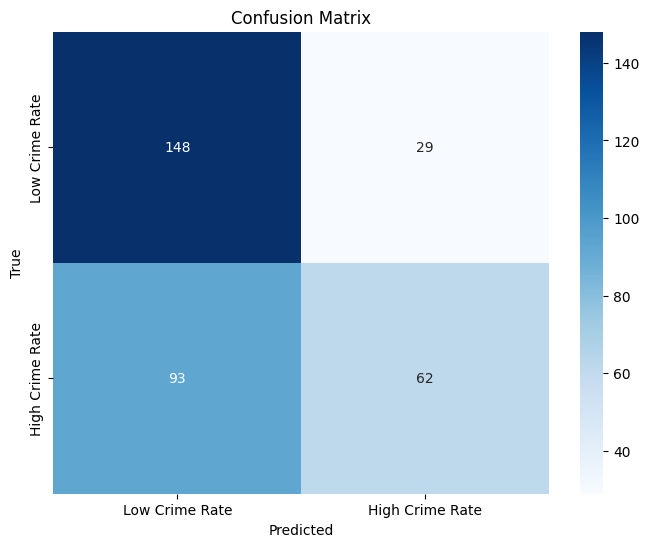

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions for the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Thresholding probabilities to obtain predicted classes

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Crime Rate', 'High Crime Rate'],
            yticklabels=['Low Crime Rate', 'High Crime Rate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [28]:
# Print the summary of the model
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 45        
                                                                 
 dense_11 (Dense)            (None, 3)                 18        
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


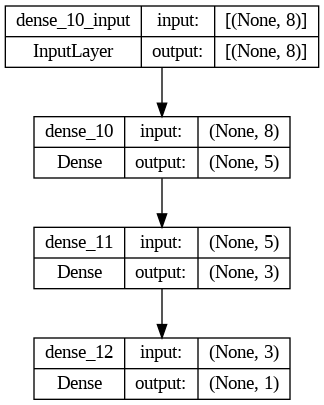

In [24]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture as a graph
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [25]:
# Combine X_train and y_train into a single dataset
train_data = pd.concat([X_train, y_train], axis=1)

# Combine X_test and y_test into a single dataset
test_data = pd.concat([X_test, y_test], axis=1)

# Save combined train and test data to CSV files
train_data.to_csv('train_data_NN.csv', index=False)
test_data.to_csv('test_data_NN.csv', index=False)


In [26]:
train_data

,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,crime_level
221,90118,2,8,22,83,400,1255,45,0
235,23148,2,10,7,81,159,344,24,1
435,30820,0,15,32,154,305,873,74,1
601,117027,1,30,102,395,1167,3565,399,1
305,164663,0,47,48,320,456,1878,151,0
...,...,...,...,...,...,...,...,...,...
466,115420,4,15,76,345,1285,2790,181,1
121,634279,276,182,4085,7199,8022,21819,6731,1
1044,92169,5,42,230,533,1070,2746,191,1
1095,52011,1,16,31,138,432,1751,33,0


In [27]:
test_data

,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,crime_level
309,170347,1,21,40,298,597,2172,124,0
1041,88155,5,32,205,550,914,2715,185,1
381,95856,5,19,58,407,892,2391,386,1
497,239031,1,50,131,438,675,3105,198,0
551,28797,2,8,1,53,66,215,12,0
...,...,...,...,...,...,...,...,...,...
394,122336,9,39,135,592,670,2848,392,1
254,29700,3,17,14,221,256,572,65,1
799,34850,2,4,11,122,296,551,40,1
312,168719,1,26,40,189,517,1856,94,0
